#### Importing the dependencies 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso 
from sklearn import  metrics 

#### Data collection and Processing 

In [2]:
df = pd.read_csv("vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.shape

(16598, 11)

In [105]:
df.size

182578

In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df.columns 

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

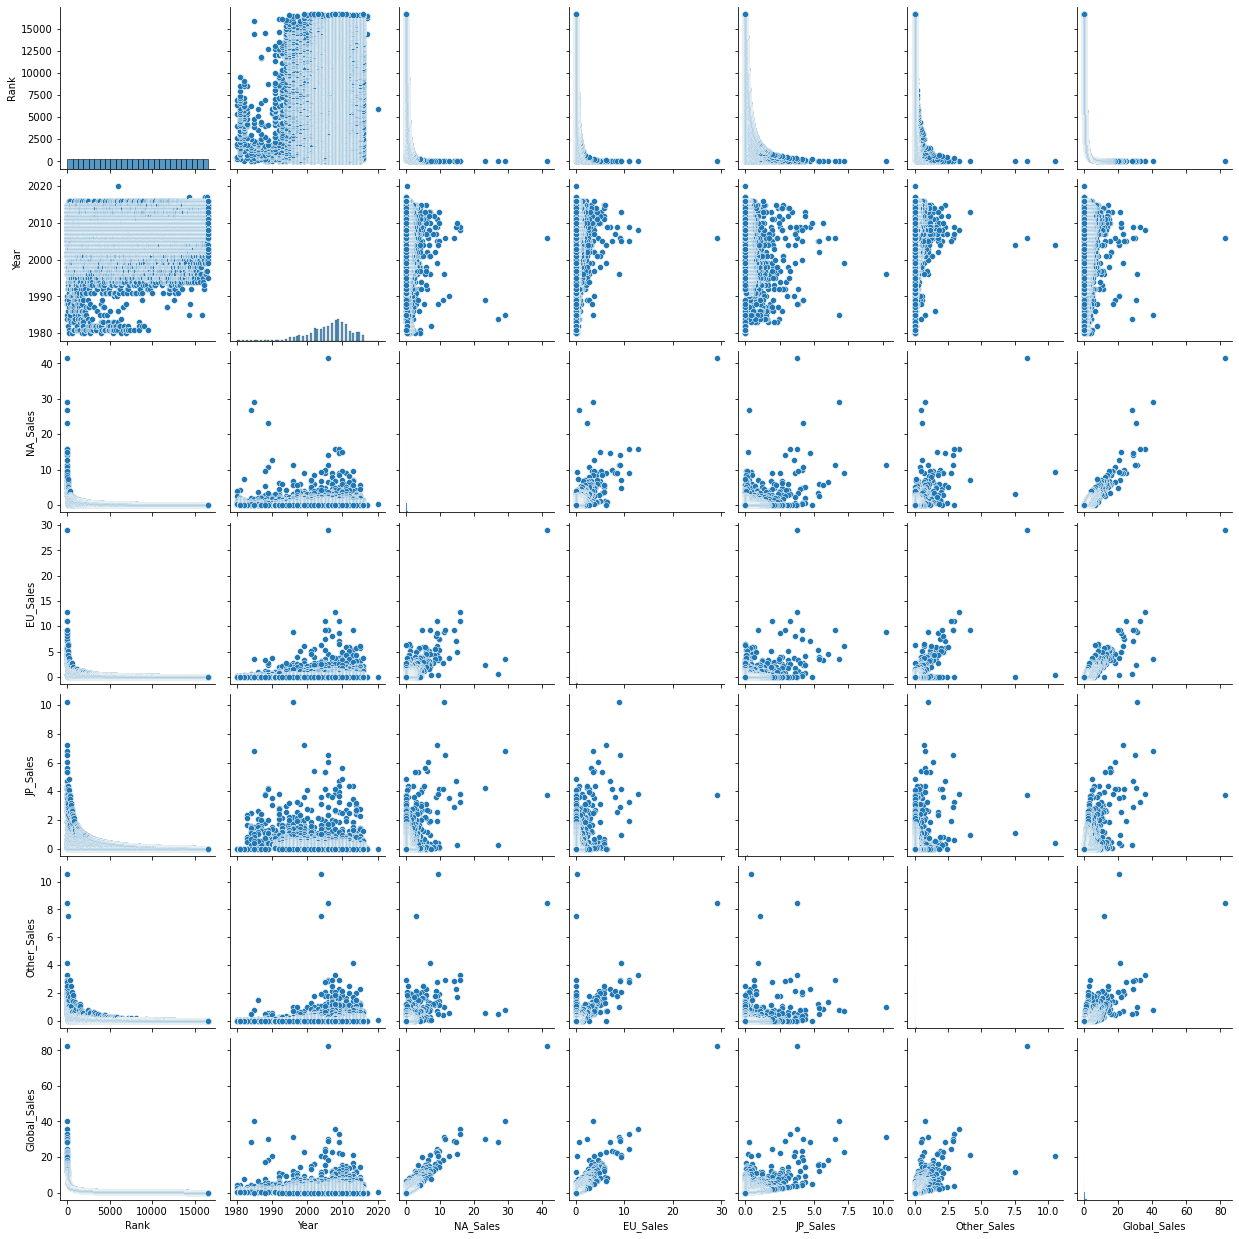

In [8]:
sns.pairplot(df)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


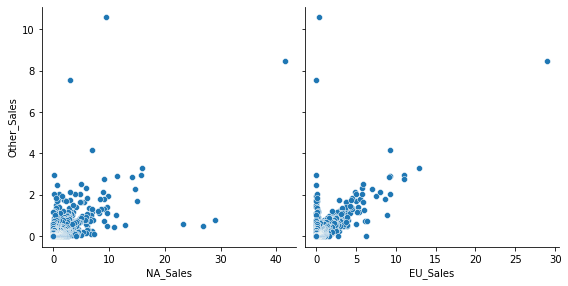

In [9]:
sns.pairplot(df, x_vars=['NA_Sales','EU_Sales'], y_vars='Other_Sales',size=4, aspect=1, kind='scatter')
plt.show()

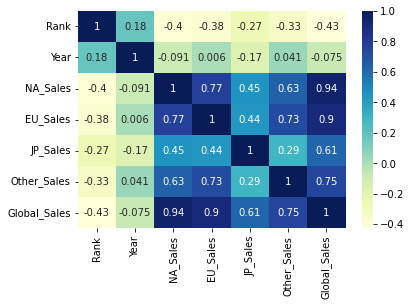

In [10]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Linear Regression 

Linear regression is a data analysis technique that predicts the value of unknown data by using another related and known data value. It mathematically models the unknown or dependent variable and the known or independent variable as a linear equation.

#### Training a Linear Regression Model 

We will need to first split up our data into an X list that contains the features to train on, and a y list with the target variable, in this case, the Price column. We will ignore the Address column because it only has text which is not useful for linear regression modeling.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X = df[[ 'NA_Sales']].values

y = df['Global_Sales'].values

In [13]:
X[:5], y[:5]

(array([[41.49],
        [29.08],
        [15.85],
        [15.75],
        [11.27]]),
 array([82.74, 40.24, 35.82, 33.  , 31.37]))

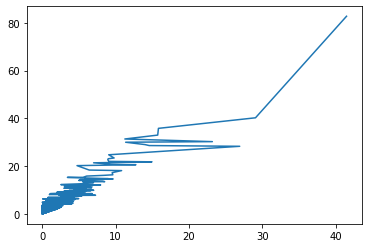

In [14]:
plt.plot(X,y)
plt.show()

#### Splite the data into Train and Test set

Now we will split our dataset into a training set and testing set using sklearn train_test_split(). the training set will be going to use for training the model and testing set for testing the model. We are creating a split of 40% training data and 60% of the training set.


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=45)

X_train and y_train contain data for the training model. X_test and y_test contain data for the testing model. X and y are features and target variable names.

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13278, 1), (13278,), (3320, 1), (3320,))

#### Creating and Training the LinearRegression Model

We will import and create sklearn linearmodel LinearRegression object and fit the training dataset in it.

In [18]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression() 
lm.fit(X_train,y_train) 

LinearRegression()

#### LinearRegression Model Evaluation

Now let’s evaluate the model by checking out its coefficients and how we can interpret them.

In [19]:
print(lm.intercept_)

0.048974425287727885


In [20]:
print(lm.score(X_test, y_test))

0.8954764351498246


### Residual analysis

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [21]:
y_train_pred = lm.predict(X_train)
res = (y_train - y_train_pred)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


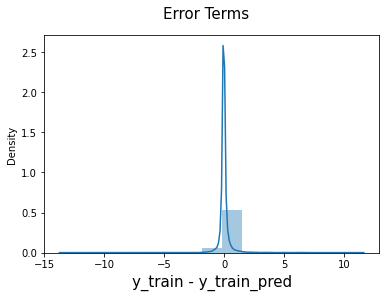

In [22]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Model Prediction

In [23]:
y_pred=lm.predict(X_test)
y_pred

array([0.04897443, 0.32597668, 0.27057623, ..., 0.49217803, 0.04897443,
       0.25210941])

In [24]:
y_pred=lm.predict(X_train)
y_pred

array([0.04897443, 0.23364259, 0.32597668, ..., 0.14130851, 0.15977533,
       0.04897443])

#### Evaluate the model on the test set

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 0.40784301936352263


In [108]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 100.00


In [27]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score: {:.2f}".format(r2))
print("Mean Squared Error: {:.2f}".format(mse))

R-squared score: 0.90
Mean Squared Error: 0.41


## Multilinear Regression

Multiple linear regression is a regression model that estimates the relationship between a quantitative dependent variable and two or more independent variables using a straight line.

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [29]:
X=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
Y=df['Global_Sales']

In [30]:
X

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.49,29.02,3.77,8.46
1,29.08,3.58,6.81,0.77
2,15.85,12.88,3.79,3.31
3,15.75,11.01,3.28,2.96
4,11.27,8.89,10.22,1.00
...,...,...,...,...
16593,0.01,0.00,0.00,0.00
16594,0.01,0.00,0.00,0.00
16595,0.00,0.00,0.00,0.00
16596,0.00,0.01,0.00,0.00


In [31]:
Y

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16598, dtype: float64

#### Test-train splitting

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(13278, 4)
(3320, 4)
(13278,)
(3320,)


#### Modeling of Multilinear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm.fit(X_train, Y_train)

LinearRegression()

In [36]:
lm = LinearRegression()
model_multi = lm.fit(X_train, Y_train)

In [37]:
# Coefficients
model_multi.coef_

array([0.99992354, 0.99998627, 0.99986709, 0.9997122 ])

In [38]:
model_multi.intercept_

0.00030771167431264956

In [39]:
X_test

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10073,0.08,0.02,0.00,0.01
7755,0.07,0.03,0.08,0.01
945,0.84,0.76,0.00,0.23
9289,0.01,0.10,0.00,0.02
13226,0.00,0.00,0.05,0.00
...,...,...,...,...
301,2.67,0.89,0.05,0.37
9272,0.09,0.04,0.00,0.01
5952,0.22,0.06,0.00,0.01
8107,0.15,0.02,0.00,0.01


In [40]:
Y_test

10073    0.11
7755     0.19
945      1.83
9289     0.14
13226    0.05
         ... 
301      3.99
9272     0.14
5952     0.30
8107     0.18
10549    0.10
Name: Global_Sales, Length: 3320, dtype: float64

#### Prediction of Multilinear Regression

Predict the global sales for the test data

In [41]:
Y_pred = lm.predict(X_test)

In [42]:
Y_multipred=model_multi.predict(X_test)[0:10]
Y_multipred

array([0.11029844, 0.19028844, 1.83016686, 0.13029982, 0.05030107,
       0.01030757, 2.79000498, 0.04030465, 0.01030757, 0.04030442])

In [43]:
multi_reg_rmse = np.sqrt(mean_squared_error(y_train, lm.predict(X_train)))
multi_reg_rmse 

2.150273390066096

#### Plot the Results

plot the scatter plot between actual values and predicted values. Use xlabel to label the x-axis and use ylabel to label the y-axis.

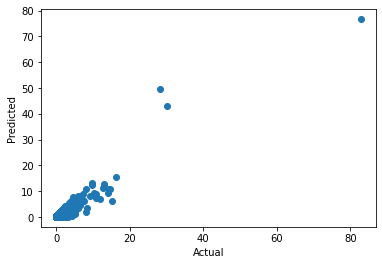

In [44]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

Regression plot of our model.

A regression plot is useful to understand the linear relationship between two parameters. It creates a regression line in-between those parameters and then plots a scatter plot of those data points.

<AxesSubplot:>

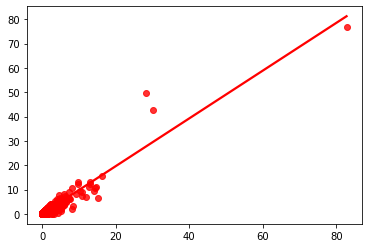

In [45]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

#### Model Tuning of multiLinear Regression

In [46]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [47]:
np.sqrt(mean_squared_error(y_train, lm.predict(X_train)))

2.150273390066096

In [48]:
np.sqrt(mean_squared_error(y_test, lm.predict(X_test)))

2.4002284560355642

In [49]:
model_multi.score(X_train, y_train)

-1.2590372317059302

In [50]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 89.55


In [51]:
print("mae",mean_absolute_error(Y_test,Y_pred))
print("mse",mean_squared_error(Y_test,Y_pred))
print("r2",r2_score(Y_test,Y_pred))

mae 0.0028786739102470366
mse 2.6802753567442298e-05
r2 0.9999848206814126


### Comparing of Each Column of X with the Predicted Values of Y

In [52]:
A=df[['NA_Sales']]
B=df[['EU_Sales']]
C=df[['JP_Sales']]
D=df[['Other_Sales']]

In [53]:
A_train,A_test,B_train,B_test,C_train,C_test,D_train,D_test=train_test_split(A,B,C,D,test_size=0.2,random_state=2)

In [54]:
print(A_train.shape)
print(A_test.shape)
print(B_train.shape)
print(B_test.shape)
print(C_train.shape)
print(C_test.shape)
print(D_train.shape)
print(D_test.shape)

(13278, 1)
(3320, 1)
(13278, 1)
(3320, 1)
(13278, 1)
(3320, 1)
(13278, 1)
(3320, 1)


In [55]:
lrA=LinearRegression()
lrB=LinearRegression()
lrC=LinearRegression()
lrD=LinearRegression()

In [56]:
lrA.fit(A_train,Y_train)

LinearRegression()

In [57]:
lrB.fit(B_train,Y_train)

LinearRegression()

In [58]:
lrC.fit(C_train,Y_train)

LinearRegression()

In [59]:
lrD.fit(D_train,Y_train)

LinearRegression()

In [60]:
A_pred=lrA.predict(A_test)
print("m=",lrA.coef_)
print("c=",lrA.intercept_)
print("mae",mean_absolute_error(Y_test,A_pred))
print("mse",mean_squared_error(Y_test,A_pred))
print("r2",r2_score(Y_test,A_pred))

m= [1.77985942]
c= 0.06631668594829238
mae 0.199534985332932
mse 0.23830732166585977
r2 0.8650383906202281


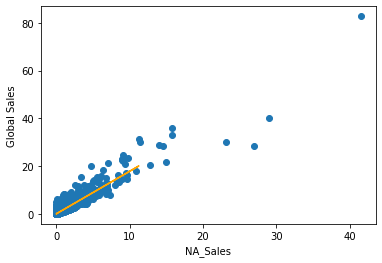

In [61]:
#Scatter Plot with NA Sales and Global Sales
plt.scatter(A,Y)
plt.xlabel("NA_Sales")
plt.ylabel("Global Sales")
#Regression line plot
plt.plot(A_test,A_pred,color="orange")

In [62]:
B_pred=lrB.predict(B_test)
print("m=",lrB.coef_)
print("c=",lrB.intercept_)
print("mae",mean_absolute_error(Y_test,B_pred))
print("mse",mean_squared_error(Y_test,B_pred))
print("r2",r2_score(Y_test,B_pred))

m= [2.7530481]
c= 0.1319079431366897
mae 0.24328313215754396
mse 0.2829597088325488
r2 0.8397502123446365


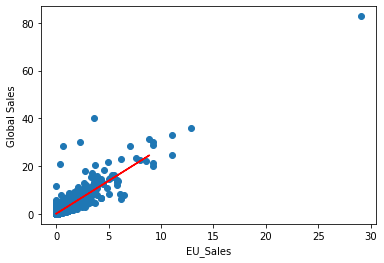

In [63]:
#Scatter Plot with EU Sales and Global Sales
plt.scatter(B,Y)
plt.xlabel("EU_Sales")
plt.ylabel("Global Sales")
#Regression line plot
plt.plot(B_test,B_pred,color="red")

In [64]:
C_pred=lrC.predict(C_test)
print("m=",lrC.coef_)
print("c=",lrC.intercept_)
print("mae",mean_absolute_error(Y_test,C_pred))
print("mse",mean_squared_error(Y_test,C_pred))
print("r2",r2_score(Y_test,C_pred))

m= [3.31866826]
c= 0.28269985292811495
mae 0.5114944876786015
mse 1.1300740551194335
r2 0.3600003049377838


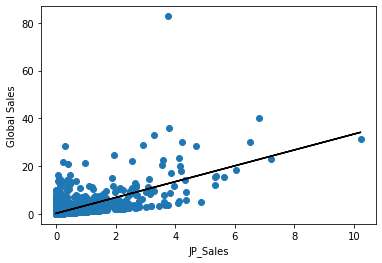

In [65]:
#Scatter Plot with JP Sales and Global Sales
plt.scatter(C,Y)
plt.xlabel("JP_Sales")
plt.ylabel("Global Sales")
#Regression line plot
plt.plot(C_test,C_pred,color="black")

In [66]:
D_pred=lrD.predict(D_test)
print("m=",lrD.coef_)
print("c=",lrD.intercept_)
print("mae",mean_absolute_error(Y_test,D_pred))
print("mse",mean_squared_error(Y_test,D_pred))
print("r2",r2_score(Y_test,D_pred))

m= [5.98573193]
c= 0.24554682596494837
mae 0.3268375166544507
mse 0.7705782085236849
r2 0.5635951323343797


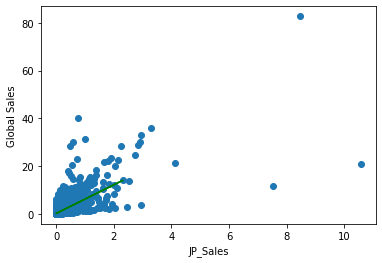

In [67]:
#Scatter Plot with Other Sales and Global Sales
plt.scatter(D,Y)
plt.xlabel("JP_Sales")
plt.ylabel("Global Sales")
#Regression line plot
plt.plot(D_test,D_pred,color="green")

## Ridge Regression

In [68]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


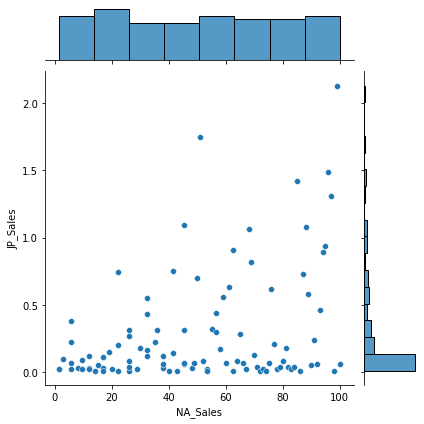

In [69]:
import seaborn as sns
s = df[(df.NA_Sales.notnull() & df.JP_Sales.notnull())]
s = df[((df.NA_Sales > 0) & (df.JP_Sales > 0))]
s = s.sample(100, random_state=0)
s = s.loc[s.NA_Sales.rank().sort_values().index]
sns.jointplot(s.NA_Sales.rank(), s.JP_Sales)

In [70]:
NA_sales_ranks = s.NA_Sales.rank().values[:, np.newaxis]
JP_sales = s.JP_Sales.values[:, np.newaxis]

In [71]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def predict(degree):
    poly = PolynomialFeatures(degree=degree)
    NA_sales_ranks_poly = poly.fit_transform(NA_sales_ranks)
    clf = LinearRegression()
    clf.fit(NA_sales_ranks_poly, JP_sales)
    JP_sale_predictions = clf.predict(NA_sales_ranks_poly)
    result = np.dstack((JP_sales.flatten(), JP_sale_predictions.flatten())).reshape((100, 2))
    return result

Text(0.5, 1.0, 'Regression with Degree 1')

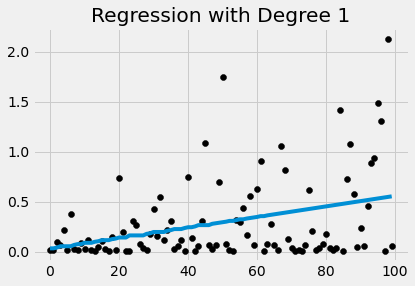

In [72]:
result = predict(1)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color='black')
plt.gca().set_title("Regression with Degree 1")

Text(0.5, 1.0, 'Regression with Degree 3')

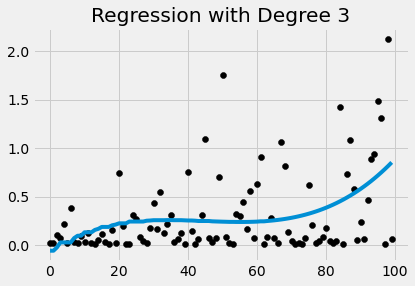

In [73]:
result = predict(3)
plt.plot(range(len(result[:, 1])), result[:, 1])
plt.scatter(range(len(result[:, 0])), result[:, 0], color='black')
plt.gca().set_title("Regression with Degree 3")

#### Split data into training and testing sets

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Modeling of ridge regression

In [76]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)  #alfa dedigimiz sey lambda.
ridge_model

Ridge(alpha=0.1)

In [77]:
ridge_model.coef_

array([0.99993965, 0.99998655, 0.99992706, 0.99889365])

In [78]:
10**np.linspace(10,-2,100)*0.5

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

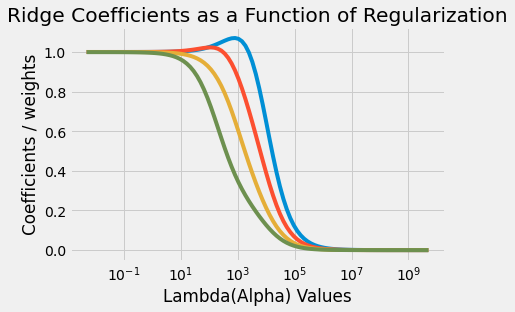

In [79]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Values')
plt.ylabel('Coefficients / weights')
plt.title('Ridge Coefficients as a Function of Regularization');

#### Prediction of Ridge regression

In [80]:
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.005234889111011519

In [81]:
r2_score(y_test, y_pred)

0.9999934773411306

#### Model Tuning of Ridge regression

In [82]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [83]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [84]:
ridge_cv.alpha_

0.005

In [85]:
#RMSE_RIDGE_TUNED=0.007477326914994773
ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))  #icindeki y_pred degeri,ayni sey( ridge_tuned.predict(x_test)=y_pred)

0.007477326914996134

In [86]:
r2_score(y_test, ridge_tuned.predict(X_test)) #R2SCORE_RIDGE_TUNED=0.9999866923175171

0.9999866923175171

In [106]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 100.00


In [87]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score: {:.2f}".format(r2))
print("Mean Squared Error: {:.2f}".format(mse))

R-squared score: 1.00
Mean Squared Error: 0.00


## Lasso Regression

Lasso regression algorithm is defined as a regularization algorithm that assists in the elimination of irrelevant parameters, thus helping in the concentration of selection and regularizes the models

#### Split data into training and testing sets

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Modeling of lasso regression

In [90]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [91]:
lasso_model.coef_

array([1.2329171 , 0.78724076, 0.        , 0.        ])

Text(0, 0.5, 'weights')

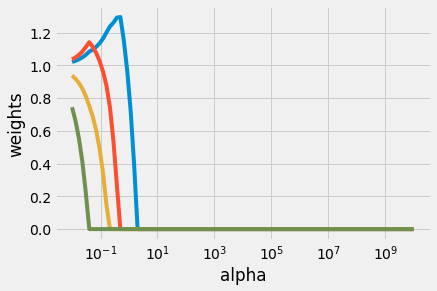

In [93]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

#### Prediction of Lasso Regression

In [95]:
lasso_model.predict(X_test)
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred)) #RMSE_LASSO=0.41714014819771006

0.41714014819771006

In [96]:
#R2SCORE_LASSO=0.9585834733163203
r2_score(y_test, y_pred)

0.9585834733163203

#### Model Tuning of Lasso regression

In [98]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)
lasso_cv_model.fit(X_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [99]:
lasso_cv_model.alpha_

1.1322898277307346e-05

In [100]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=1.1322898277307346e-05)

In [102]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred)) #RMSE_LASSO_TUNED=0.005238822375390228

0.005238822375390228

In [103]:
r2_score(y_test, y_pred) #R2_LASSO_TUNED=0.999993467535773

0.999993467535773

In [107]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 100.00


In [104]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R-squared score: {:.2f}".format(r2))
print("Mean Squared Error: {:.2f}".format(mse))

R-squared score: 1.00
Mean Squared Error: 0.00
